## **Tan Jia Jun TP063792**
## **Approach To Predicting Air Quality Using Machine Learning**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
aqd = pd.read_csv("C:\\Users\\erict\\OneDrive - Asia Pacific University\\Documents\\level 3\\Final Year Project\\dataset and code\\before edit air quality.csv")  ##air quality data
wd = pd.read_csv("C:\\Users\\erict\\OneDrive - Asia Pacific University\\Documents\\level 3\\Final Year Project\dataset and code\\before split weather delhi.csv") ## weather delhi data

In [6]:
aqd.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [7]:
wd.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,14,19,0,50,0.0,1016,10,10,331,12
1,2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,13,21,0,51,0.0,1016,10,10,329,13
2,2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,12,22,0,52,0.0,1016,9,10,327,13
3,2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,11,23,0,54,0.0,1016,9,10,326,13
4,2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,11,21,2,52,0.0,1016,9,10,318,13


In [8]:
aqd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [9]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [10]:
aqd = aqd[aqd['City'] == 'Delhi']

aqd['Datetime'] = pd.to_datetime(aqd['Datetime']) ## Converting the date column to datetime format
aqd.head(10)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
245172,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN
245173,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN
245174,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN
245175,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN
245176,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN
245177,Delhi,2015-01-01 06:00:00,384.16,862.23,59.84,32.06,78.34,30.71,11.04,7.33,12.33,10.70,20.85,12.42,NaN,NaN
245178,Delhi,2015-01-01 07:00:00,344.44,731.83,66.55,30.97,84.67,30.64,8.39,8.00,58.67,10.15,19.80,10.35,NaN,NaN
245179,Delhi,2015-01-01 08:00:00,337.98,725.74,72.93,26.83,90.44,28.10,7.89,9.00,13.42,11.53,21.53,10.24,NaN,NaN
245180,Delhi,2015-01-01 09:00:00,285.22,656.93,69.37,26.22,92.62,31.46,4.25,6.67,55.30,12.10,21.25,9.01,NaN,NaN
245181,Delhi,2015-01-01 10:00:00,258.42,525.54,48.56,27.70,80.05,32.75,15.31,6.67,54.28,10.03,18.83,7.45,NaN,NaN


In [11]:
wd['date_time'] = pd.to_datetime(wd['date_time'])  ## Converting the date column to datetime format
wd.rename(columns={'date_time': 'Datetime'}, inplace=True)
start_date = pd.to_datetime("2015-01-01 01:00:00")
end_date = pd.to_datetime("2019-12-31 23:00:00")
wd= wd[(wd['Datetime'] >= start_date) & (wd['Datetime'] <= end_date)]
wd.head(10)

,Datetime,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
52585,2015-01-01 01:00:00,23,11,0.0,8.7,4,1,72,02:39 PM,03:24 AM,...,12,18,15,51,0.0,1016,11,10,16,9
52586,2015-01-01 02:00:00,23,11,0.0,8.7,4,1,72,02:39 PM,03:24 AM,...,12,15,15,51,0.0,1016,11,10,11,8
52587,2015-01-01 03:00:00,23,11,0.0,8.7,4,1,72,02:39 PM,03:24 AM,...,13,11,15,50,0.0,1016,11,10,5,6
52588,2015-01-01 04:00:00,23,11,0.0,8.7,4,1,72,02:39 PM,03:24 AM,...,13,12,13,48,0.0,1017,12,10,3,7
52589,2015-01-01 05:00:00,23,11,0.0,8.7,4,1,72,02:39 PM,03:24 AM,...,14,13,11,46,0.0,1018,12,10,2,9
52590,2015-01-01 06:00:00,23,11,0.0,8.7,4,4,72,02:39 PM,03:24 AM,...,14,14,9,45,0.0,1018,13,10,0,10
52591,2015-01-01 07:00:00,23,11,0.0,8.7,4,5,72,02:39 PM,03:24 AM,...,16,12,11,39,0.0,1018,15,10,11,9
52592,2015-01-01 08:00:00,23,11,0.0,8.7,4,5,72,02:39 PM,03:24 AM,...,19,9,14,34,0.0,1018,17,10,22,7
52593,2015-01-01 09:00:00,23,11,0.0,8.7,4,5,72,02:39 PM,03:24 AM,...,21,7,16,29,0.0,1018,20,10,34,6
52594,2015-01-01 10:00:00,23,11,0.0,8.7,4,6,72,02:39 PM,03:24 AM,...,22,7,16,26,0.0,1018,21,10,33,6


In [12]:
final=pd.merge(aqd,wd, on="Datetime", how="inner")
final.set_index('Datetime', inplace=True)
final.head(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,Delhi,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,...,12,18,15,51,0.0,1016,11,10,16,9
2015-01-01 02:00:00,Delhi,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,...,12,15,15,51,0.0,1016,11,10,11,8
2015-01-01 03:00:00,Delhi,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,...,13,11,15,50,0.0,1016,11,10,5,6
2015-01-01 04:00:00,Delhi,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,...,13,12,13,48,0.0,1017,12,10,3,7
2015-01-01 05:00:00,Delhi,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,...,14,13,11,46,0.0,1018,12,10,2,9
2015-01-01 06:00:00,Delhi,384.16,862.23,59.84,32.06,78.34,30.71,11.04,7.33,12.33,...,14,14,9,45,0.0,1018,13,10,0,10
2015-01-01 07:00:00,Delhi,344.44,731.83,66.55,30.97,84.67,30.64,8.39,8.00,58.67,...,16,12,11,39,0.0,1018,15,10,11,9
2015-01-01 08:00:00,Delhi,337.98,725.74,72.93,26.83,90.44,28.10,7.89,9.00,13.42,...,19,9,14,34,0.0,1018,17,10,22,7
2015-01-01 09:00:00,Delhi,285.22,656.93,69.37,26.22,92.62,31.46,4.25,6.67,55.30,...,21,7,16,29,0.0,1018,20,10,34,6


In [13]:
final.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'maxtempC',
       'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'uvIndex.1',
       'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset',
       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [14]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43823 entries, 2015-01-01 01:00:00 to 2019-12-31 23:00:00
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               43823 non-null  object 
 1   PM2.5              43448 non-null  float64
 2   PM10               41402 non-null  float64
 3   NO                 43525 non-null  float64
 4   NO2                43493 non-null  float64
 5   NOx                43798 non-null  float64
 6   NH3                42843 non-null  float64
 7   CO                 43459 non-null  float64
 8   SO2                40971 non-null  float64
 9   O3                 41622 non-null  float64
 10  Benzene            43785 non-null  float64
 11  Toluene            43797 non-null  float64
 12  Xylene             24919 non-null  float64
 13  AQI                43325 non-null  float64
 14  AQI_Bucket         43325 non-null  object 
 15  maxtempC           43823 non-null  

In [15]:
final.isna().sum()

City                     0
PM2.5                  375
PM10                  2421
NO                     298
NO2                    330
NOx                     25
NH3                    980
CO                     364
SO2                   2852
O3                    2201
Benzene                 38
Toluene                 26
Xylene               18904
AQI                    498
AQI_Bucket             498
maxtempC                 0
mintempC                 0
totalSnow_cm             0
sunHour                  0
uvIndex                  0
uvIndex.1                0
moon_illumination        0
moonrise                 0
moonset                  0
sunrise                  0
sunset                   0
DewPointC                0
FeelsLikeC               0
HeatIndexC               0
WindChillC               0
WindGustKmph             0
cloudcover               0
humidity                 0
precipMM                 0
pressure                 0
tempC                    0
visibility               0
w

## **Data Cleaning**

In [16]:
final=final.drop(['City','NO','NO2','Benzene','Toluene','Xylene','maxtempC','mintempC','totalSnow_cm','uvIndex','uvIndex.1','moon_illumination','sunrise', 'sunset',
'moonrise', 'moonset','DewPointC','FeelsLikeC','WindChillC',"precipMM","AQI_Bucket"],axis=1)

In [17]:
final['PM2.5'] = final['PM2.5'].fillna(final['PM2.5'].mean().round(2))
final['PM10'] = final['PM10'].fillna(final['PM10'].mean().round(2))
final['NOx'] = final['NOx'].fillna(final['NOx'].mean().round(2))
final['NH3'] = final['NH3'].fillna(final['NH3'].mean().round(2))
final['CO'] = final['CO'].fillna(final['CO'].mean().round(2))
final['SO2'] = final['SO2'].fillna(final['SO2'].mean().round(2))
final['O3'] = final['O3'].fillna(final['O3'].mean().round(2))
final.isna().sum() #check missing value

PM2.5              0
PM10               0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
AQI              498
sunHour            0
HeatIndexC         0
WindGustKmph       0
cloudcover         0
humidity           0
pressure           0
tempC              0
visibility         0
winddirDegree      0
windspeedKmph      0
dtype: int64

## **ADD new features**

In [18]:
## PM2.5 Sub-Index calculation
## convert to national sub-index
## PM2.5 from range 0-30 corresponds naqi range 0-50
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

final["PM2.5_SubIndex"] = final["PM2.5"].apply(lambda x: get_PM25_subindex(x))

In [19]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

final["PM10_SubIndex"] = final["PM10"].apply(lambda x: get_PM10_subindex(x))

In [20]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

final["NOx_SubIndex"] = final["NOx"].apply(lambda x: get_NOx_subindex(x))

In [21]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

final["NH3_SubIndex"] = final["NH3"].apply(lambda x: get_NH3_subindex(x))

In [22]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

final["CO_SubIndex"] = final["CO"].apply(lambda x: get_CO_subindex(x))

In [23]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

final["SO2_SubIndex"] = final["SO2"].apply(lambda x: get_SO2_subindex(x))

In [24]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

final["O3_SubIndex"] = final["O3"].apply(lambda x: get_O3_subindex(x))

In [25]:
final["Checks"] = (final["PM2.5_SubIndex"] > 0).astype(int) + \
                (final["PM10_SubIndex"] > 0).astype(int) + \
                (final["SO2_SubIndex"] > 0).astype(int) + \
                (final["NOx_SubIndex"] > 0).astype(int) + \
                (final["NH3_SubIndex"] > 0).astype(int) + \
                (final["CO_SubIndex"] > 0).astype(int) + \
                (final["O3_SubIndex"] > 0).astype(int)

In [26]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN
final["AQI_calculated"] = round(final[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
final.loc[final["PM2.5_SubIndex"] + final["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
final.loc[final.Checks < 3, "AQI_calculated"] = np.NaN
final["AQI_bucket_calculated"] = final["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

In [27]:
final.columns

Index(['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI', 'sunHour',
       'HeatIndexC', 'WindGustKmph', 'cloudcover', 'humidity', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'PM2.5_SubIndex', 'PM10_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'SO2_SubIndex', 'O3_SubIndex', 'Checks',
       'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [28]:
#Delete column

final = final.drop(["PM2.5","PM10","NOx","NH3","CO","SO2","O3","AQI","AQI_bucket_calculated","visibility","Checks"],axis=1)

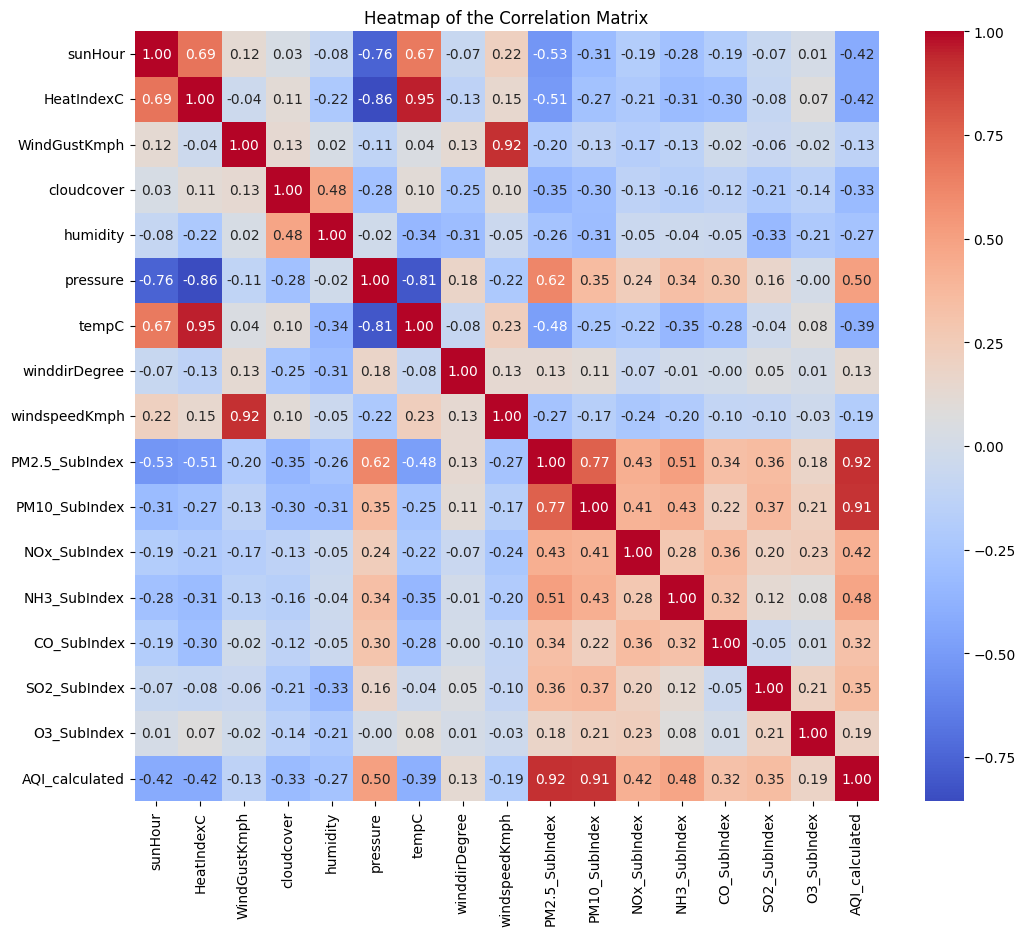

In [29]:
# Compute the correlation matrix
import seaborn as sns
correlation_matrix = final.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

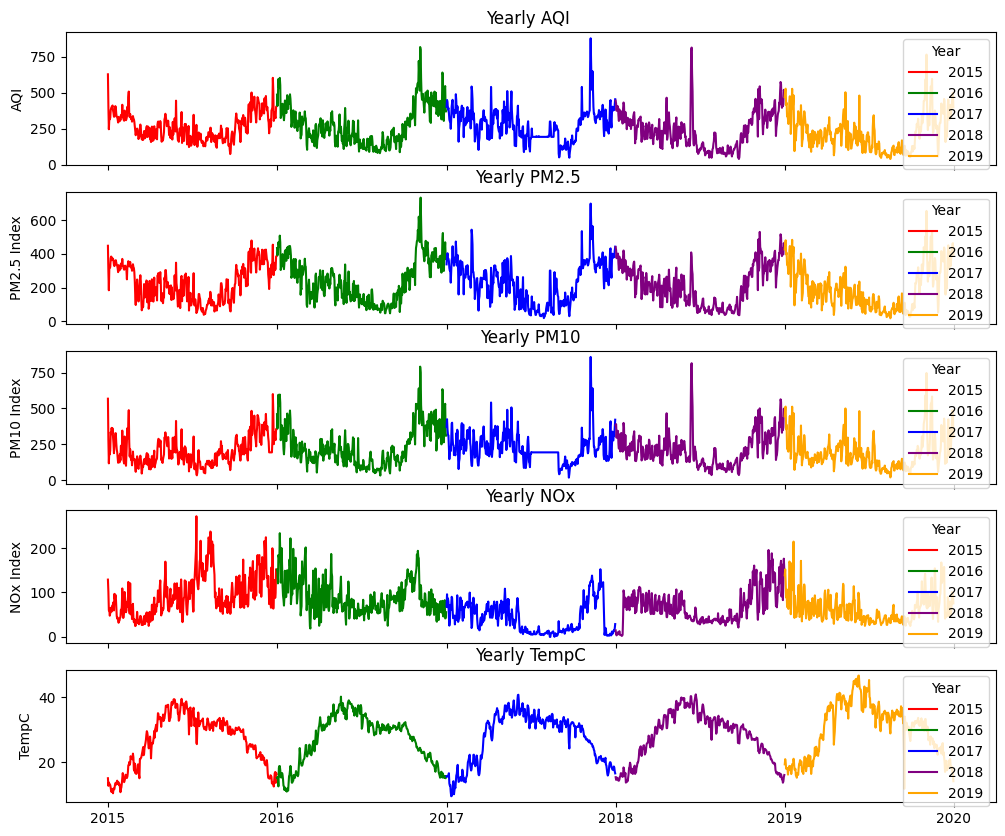

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.dates as mdates

# Define colors for the plots
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Step 1: Resample the data to daily averages
final_daily = final.resample('D').mean()

# Step 2: Create subplots for the first set of pollutants
fig1, axs1 = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

# Plot daily AQI SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs1[0].plot(year_data.index, year_data['AQI_calculated'], label=str(year), color=colors[i % len(colors)])
axs1[0].set_title('Yearly AQI ')
axs1[0].set_ylabel('AQI')
axs1[0].legend(title='Year')

# Plot daily PM2.5 SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs1[1].plot(year_data.index, year_data['PM2.5_SubIndex'], label=str(year), color=colors[i % len(colors)])
axs1[1].set_title('Yearly PM2.5 ')
axs1[1].set_ylabel('PM2.5 Index')
axs1[1].legend(title='Year')

# Plot daily PM10 SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs1[2].plot(year_data.index, year_data['PM10_SubIndex'], label=str(year), color=colors[i % len(colors)])
axs1[2].set_title('Yearly PM10')
axs1[2].set_ylabel('PM10 Index')
axs1[2].legend(title='Year')

# Plot daily NOx SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs1[3].plot(year_data.index, year_data['NOx_SubIndex'], label=str(year), color=colors[i % len(colors)])
axs1[3].set_title('Yearly NOx')
axs1[3].set_ylabel('NOx Index')
axs1[3].legend(title='Year')

# Plot daily NOx SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs1[4].plot(year_data.index, year_data['tempC'], label=str(year), color=colors[i % len(colors)])
axs1[4].set_title('Yearly TempC')
axs1[4].set_ylabel('TempC')
axs1[4].legend(title='Year')

# shot the plot
plt.show()

plt.tight_layout()
plt.show()


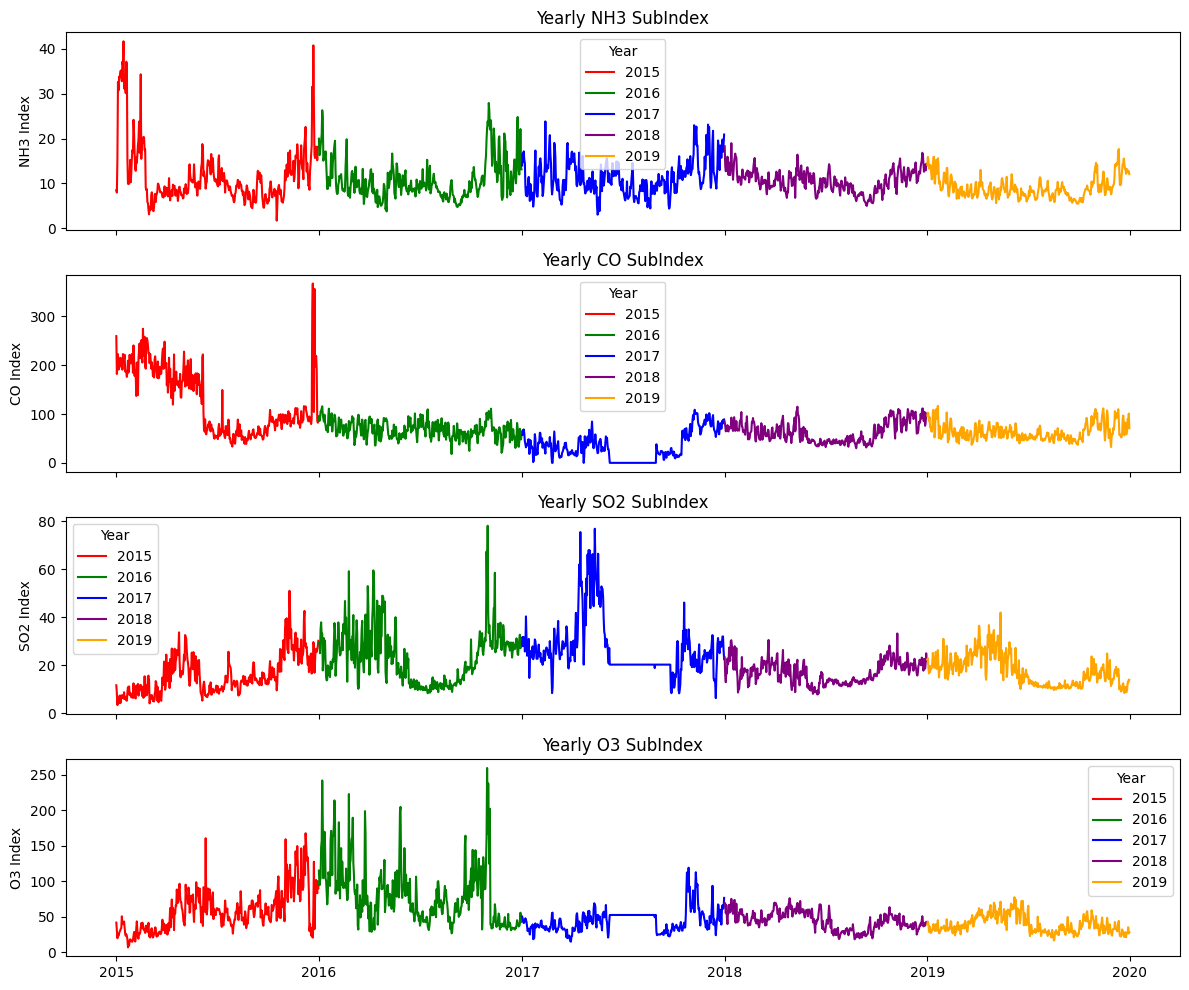

In [31]:

fig2, axs2 = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot daily NH3 SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs2[0].plot(year_data.index, year_data['NH3_SubIndex'], label=str(year), color=colors[i % len(colors)])
axs2[0].set_title('Yearly NH3 SubIndex')
axs2[0].set_ylabel('NH3 Index')
axs2[0].legend(title='Year')

# Plot daily CO SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs2[1].plot(year_data.index, year_data['CO_SubIndex'], label=str(year), color=colors[i % len(colors)])
axs2[1].set_title('Yearly CO SubIndex')
axs2[1].set_ylabel('CO Index')
axs2[1].legend(title='Year')

# Plot daily SO2 SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs2[2].plot(year_data.index, year_data['SO2_SubIndex'], label=str(year), color=colors[i % len(colors)])
axs2[2].set_title('Yearly SO2 SubIndex')
axs2[2].set_ylabel('SO2 Index')
axs2[2].legend(title='Year')

# Plot daily O3 SubIndex
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs2[3].plot(year_data.index, year_data['O3_SubIndex'], label=str(year), color=colors[i % len(colors)])
axs2[3].set_title('Yearly O3 SubIndex')
axs2[3].set_ylabel('O3 Index')
axs2[3].legend(title='Year')

plt.tight_layout()
plt.show()


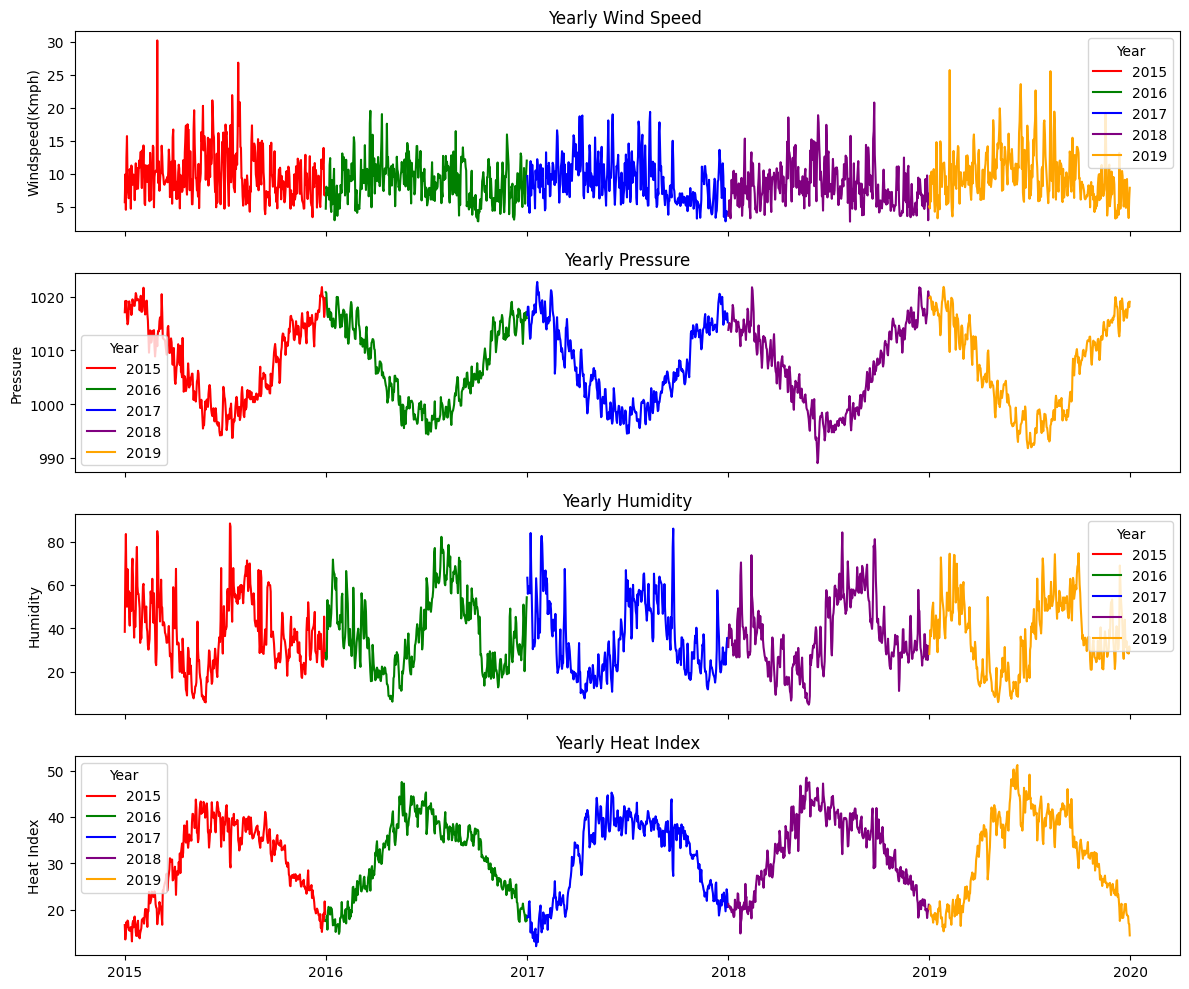

In [32]:

fig3, axs3 = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot daily wind speed
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs3[0].plot(year_data.index, year_data['windspeedKmph'], label=str(year), color=colors[i % len(colors)])
axs3[0].set_title('Yearly Wind Speed ')
axs3[0].set_ylabel('Windspeed(Kmph)')
axs3[0].legend(title='Year')

# Plot daily pressure
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs3[1].plot(year_data.index, year_data['pressure'], label=str(year), color=colors[i % len(colors)])
axs3[1].set_title('Yearly Pressure')
axs3[1].set_ylabel('Pressure')
axs3[1].legend(title='Year')

# Plot daily humidity
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs3[2].plot(year_data.index, year_data['humidity'], label=str(year), color=colors[i % len(colors)])
axs3[2].set_title('Yearly Humidity')
axs3[2].set_ylabel('Humidity')
axs3[2].legend(title='Year')

# Plot daily heat index
for i, year in enumerate(final_daily.index.year.unique()):
    year_data = final_daily[final_daily.index.year == year]
    axs3[3].plot(year_data.index, year_data['HeatIndexC'], label=str(year), color=colors[i % len(colors)])
axs3[3].set_title('Yearly Heat Index')
axs3[3].set_ylabel('Heat Index')
axs3[3].legend(title='Year')

plt.tight_layout()
plt.show()

In [33]:
describe1=final.describe()
describe1.transpose()

,count,mean,std,min,25%,50%,75%,max
sunHour,43823.0,11.135269,2.176952,3.800000,8.700000,11.6000,13.200000,14.000000
HeatIndexC,43823.0,31.348698,9.147435,8.000000,24.000000,32.0000,39.000000,61.000000
WindGustKmph,43823.0,11.888757,6.155202,0.000000,7.000000,11.0000,15.000000,72.000000
cloudcover,43823.0,15.690140,21.646993,0.000000,0.000000,5.0000,24.000000,100.000000
humidity,43823.0,37.077585,18.417494,2.000000,23.000000,35.0000,50.000000,99.000000
pressure,43823.0,1007.213358,7.752347,987.000000,1000.000000,1007.0000,1014.000000,1025.000000
tempC,43823.0,27.876184,8.447188,0.000000,21.000000,29.0000,34.000000,51.000000
winddirDegree,43823.0,213.009744,99.689094,0.000000,117.000000,252.0000,300.000000,360.000000
windspeedKmph,43823.0,9.201949,4.561690,0.000000,6.000000,9.0000,12.000000,44.000000
PM2.5_SubIndex,43823.0,222.163192,139.609609,0.083333,90.633333,206.3000,330.480769,929.615385


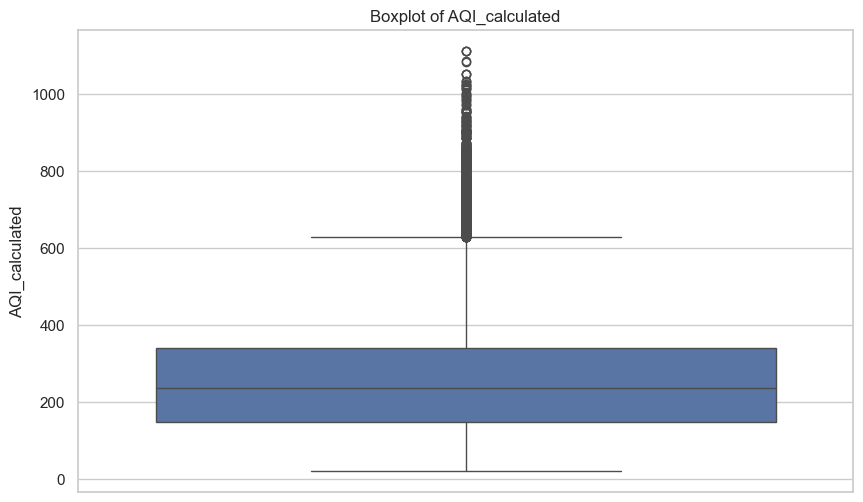

In [31]:
sns.set(style="whitegrid")

# Create a boxplot for the AQI_calculated column
plt.figure(figsize=(10, 6))
sns.boxplot(y=final['AQI_calculated'])
plt.title('Boxplot of AQI_calculated')
plt.ylabel('AQI_calculated')
plt.show()

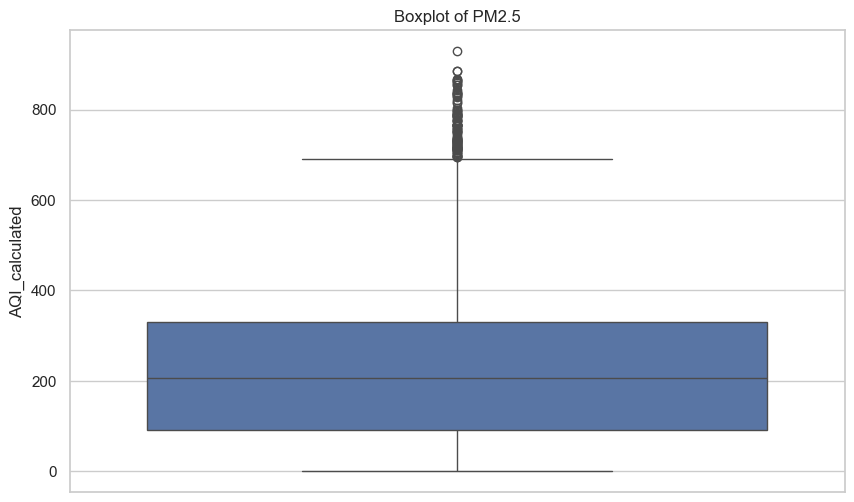

In [88]:
sns.set(style="whitegrid")

# Create a boxplot for the AQI_calculated column
plt.figure(figsize=(10, 6))
sns.boxplot(y=final['PM2.5_SubIndex'])
plt.title('Boxplot of PM2.5')
plt.ylabel('AQI_calculated')
plt.show()

<Figure size 1200x800 with 0 Axes>

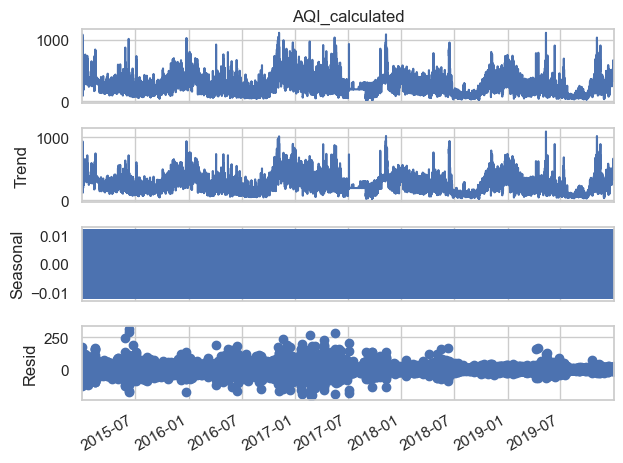

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

frequency = 2

# Decompose AQI using seasonal decomposition
decompose_result = seasonal_decompose(final['AQI_calculated'], model='additive', period=frequency)

plt.figure(figsize=(12, 8))
# Plot the seasonal decomposition results
decompose_result.plot()

# Adjust the x-axis date format to display dates appropriately
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Display labels every six months

# Automatically format the x-axis date labels to fit the graph
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

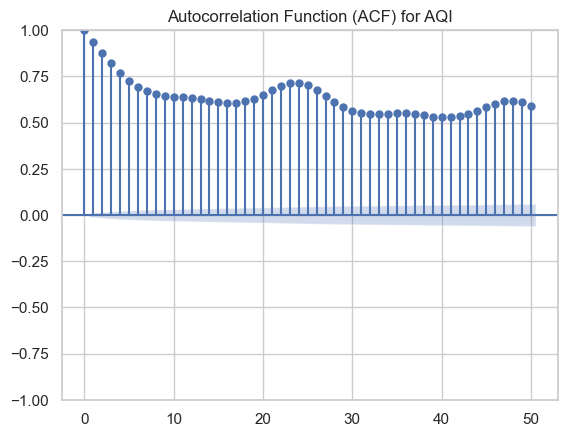

<Figure size 1400x700 with 0 Axes>

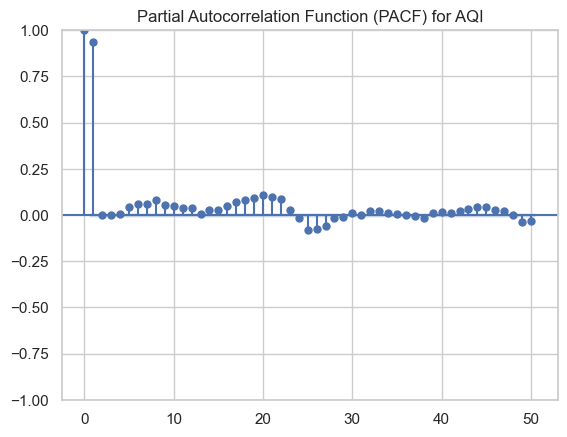

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(14, 7))
plot_acf(final['AQI_calculated'], lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for AQI')
plt.show()

# Plotting the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(14, 7))
plot_pacf(final['AQI_calculated'], lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) for AQI')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(final['AQI_calculated'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Num Of Lags : %f' % result[2])
print('Num Of Observations Used For ADF Regression and Critical Values Calculation :%f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.668297
p-value: 0.000000
Num Of Lags : 54.000000
Num Of Observations Used For ADF Regression and Critical Values Calculation :43768.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [36]:
train = final['AQI_calculated'][:-2]
test = final['AQI_calculated'][-2:]

In [37]:
import pmdarima as pmd
from pmdarima import auto_arima
auto_arima_model = auto_arima(train, start_p=0, start_q=0,
                              max_p=5, max_q=5, m=2,
                              start_P=0, seasonal=True,
                              d=1, D=1, trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[2]             : AIC=inf, Time=2.76 sec
 ARIMA(0,1,0)(0,1,0)[2]             : AIC=499370.940, Time=0.30 sec
 ARIMA(1,1,0)(1,1,0)[2]             : AIC=488023.844, Time=2.55 sec
 ARIMA(0,1,1)(0,1,1)[2]             : AIC=inf, Time=3.84 sec
 ARIMA(1,1,0)(0,1,0)[2]             : AIC=499372.820, Time=0.57 sec
 ARIMA(1,1,0)(2,1,0)[2]             : AIC=483027.531, Time=3.87 sec
 ARIMA(1,1,0)(2,1,1)[2]             : AIC=inf, Time=8.42 sec
 ARIMA(1,1,0)(1,1,1)[2]             : AIC=inf, Time=6.62 sec
 ARIMA(0,1,0)(2,1,0)[2]             : AIC=483068.424, Time=1.21 sec
 ARIMA(1,1,1)(2,1,0)[2]             : AIC=inf, Time=13.33 sec
 ARIMA(0,1,1)(2,1,0)[2]             : AIC=483018.533, Time=4.19 sec
 ARIMA(0,1,1)(1,1,0)[2]             : AIC=488018.454, Time=2.60 sec
 ARIMA(0,1,1)(2,1,1)[2]             : AIC=inf, Time=8.54 sec
 ARIMA(0,1,1)(1,1,1)[2]             : AIC=inf, Time=6.72 sec
 ARIMA(0,1,1)(2,1,0)[2] intercept   : AIC=483020.533,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                43821
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 2)   Log Likelihood             -241505.267
Date:                            Mon, 29 Apr 2024   AIC                         483018.533
Time:                                    13:27:39   BIC                         483053.285
Sample:                                01-01-2015   HQIC                        483029.486
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0379      0.002     18.283      0.000       0.034       0.042
ar.S.L2       -0.6350      0.002   -320.502      0.000      -0.639      -0.631
ar.S.L4       -0.3292      0.002   -147.299      0.000      -0.334      -0.325
sigma2      3587.5604      8.921    402.143      0.000    3570.075    3605.045
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):            550715.07
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train,
                       order=(0,1,1),
                       seasonal_order=(2, 1, 0, 2),
                       enforce_stationarity=True,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Summary of the model
sarima_summary = sarima_result.summary()
sarima_summary

c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     AQI_calculated   No. Observations:                43821
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 2)   Log Likelihood             -241505.267
Date:                            Mon, 29 Apr 2024   AIC                         483018.533
Time:                                    13:27:45   BIC                         483053.285
Sample:                                01-01-2015   HQIC                        483029.486
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0379      0.002     18.282      0.000       0.034       0.042
ar.S.L2       -0.6350      0.002   -320.505      0.000      -0.639      -0.631
ar.S.L4       -0.3292      0.002   -147.304      0.000      -0.334      -0.325
sigma2      3587.5261      8.921    402.147      0.000    3570.041    3605.011
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):            550713.12
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
#Display the actual result
final_tail = final["AQI_calculated"].tail(2)
print(final_tail)

Datetime
2019-12-31 22:00:00    648.0
2019-12-31 23:00:00    642.0
Name: AQI_calculated, dtype: float64


In [40]:
# Forecasting for the next 2 hours, with an hourly breakdown
forecast = sarima_result.get_forecast(steps=2)

# Extracting the mean values of the forecast
forecast_mean = forecast.predicted_mean

# Optional: Creating a DataFrame to store the forecasted results
forecast_dates = pd.date_range(start=train.index[-1], periods=3, freq='H')[1:]  # Generating forecast dates
forecast_df = pd.DataFrame({'Forecasted AQI_calculated': forecast_mean.values}, index=forecast_dates)

# Displaying the forecasted results
forecast_df



C:\Users\erict\AppData\Local\Temp\ipykernel_18012\3023987575.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_dates = pd.date_range(start=train.index[-1], periods=3, freq='H')[1:]  # Generating forecast dates


,Forecasted AQI_calculated
2019-12-31 22:00:00,644.877654
2019-12-31 23:00:00,706.255878


In [41]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

actual = test  # The actual test set values
predicted = forecast_mean  # The forecasted values

rmse = mean_squared_error(actual, predicted, squared=False)
mae = mean_absolute_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)

print("Mae:",mae)
print("RMSE:",rmse)
print("MAPE:",mape)

Mae: 33.68911195253219
RMSE: 45.48937760553519
MAPE: 0.052452736213781784


c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


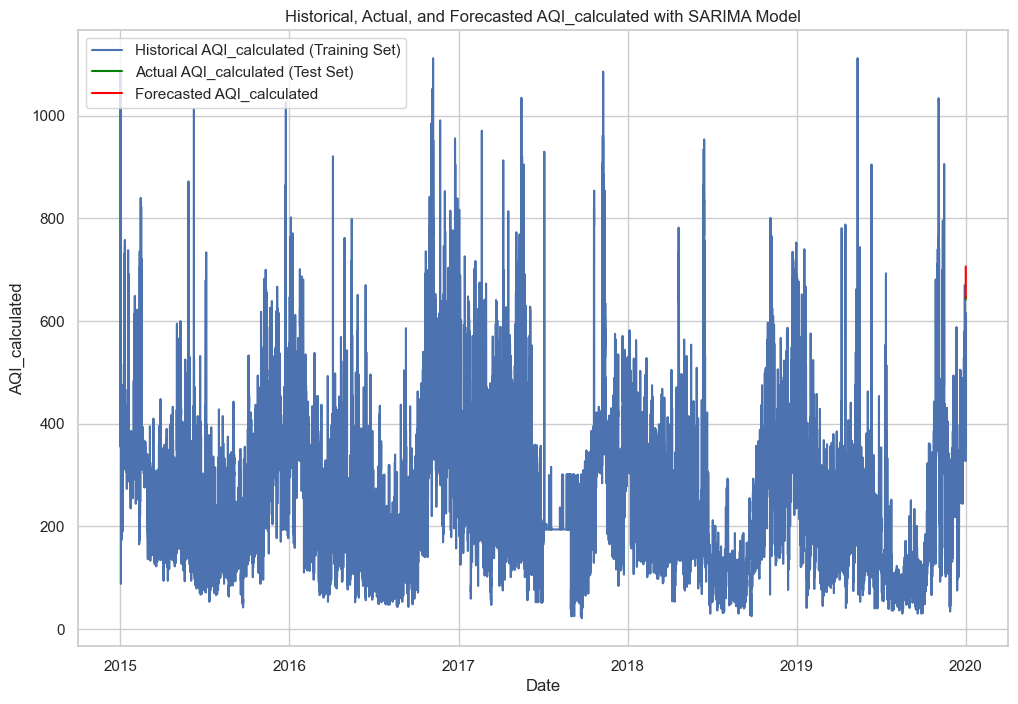

In [42]:
from math import sqrt

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(train, label='Historical AQI_calculated (Training Set)')
plt.plot(test, label='Actual AQI_calculated (Test Set)', color='green')
plt.plot(forecast_df, label='Forecasted AQI_calculated', color='red')
plt.xlabel('Date')
plt.ylabel('AQI_calculated')
plt.title('Historical, Actual, and Forecasted AQI_calculated with SARIMA Model')
plt.legend()
plt.show()

In [43]:
# use auto arima find the optimize hyperparamter
best_model = auto_arima(train, start_p=0, start_q=0,
                        max_p=3, max_q=3, m=2,
                        start_P=0, seasonal=False,
                        d=1, D=1, trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

best_model.summary()

c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (2) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=467894.979, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=467860.563, Time=1.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=467858.235, Time=2.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=467892.980, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=465211.919, Time=15.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=465089.097, Time=15.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=467828.006, Time=1.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=464926.147, Time=22.63 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=467778.334, Time=2.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=465065.450, Time=34.62 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=464871.408, Time=31.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=465104.873, Time=17.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=465095.002, Time=22.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=464981.039, Time=21.36 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                43821
Model:               SARIMAX(2, 1, 2)   Log Likelihood             -232361.862
Date:                Mon, 29 Apr 2024   AIC                         464733.724
Time:                        13:33:19   BIC                         464777.164
Sample:                    01-01-2015   HQIC                        464747.415
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6946      0.009    189.326      0.000       1.677       1.712
ar.L2         -0.7543      0.007   -105.038      0.000      -0.768      -0.740
ma.L1         -1.7832      0.009   -190.628      0.000      -1.802      -1.765
ma.L2          0.7993      0.009     88.915      0.000       0.782       0.817
sigma2      2354.8264      5.625    418.609      0.000    2343.801    2365.852
===================================================================================
Ljung-Box (L1) (Q):                   6.18   Jarque-Bera (JB):            615044.03
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Building the ARIMA model
model = ARIMA(train, order=(2,1,0))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()
model_summary

c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         AQI_calculated   No. Observations:                43821
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -233910.003
Date:                Mon, 29 Apr 2024   AIC                         467826.006
Time:                        13:33:22   BIC                         467852.069
Sample:                    01-01-2015   HQIC                        467834.220
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0297      0.002    -15.650      0.000      -0.033      -0.026
ar.L2         -0.0281      0.002    -13.196      0.000      -0.032      -0.024
sigma2      2530.0297      5.985    422.751      0.000    2518.300    2541.759
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            631535.45
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# Perform hourly forecasts for the next 2 hours
forecast_arima = model_fit.get_forecast(steps=2)

# Get the mean values of the forecasts
forecast_mean_arima = forecast_arima.predicted_mean

# Optional: Create a DataFrame containing the forecasted results
forecast_dates = pd.date_range(start=train.index[-1], periods=3, freq='H')[1:]  # Generate forecast dates
forecast_df_arima = pd.DataFrame({'Forecasted AQI_calculated': forecast_mean_arima.values}, index=forecast_dates)

# Output the forecast results
forecast_df_arima

C:\Users\erict\AppData\Local\Temp\ipykernel_18012\157909097.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_dates = pd.date_range(start=train.index[-1], periods=3, freq='H')[1:]  # Generate forecast dates


,Forecasted AQI_calculated
2019-12-31 22:00:00,609.700165
2019-12-31 23:00:00,605.898805


In [46]:
#Display the actual result
final_tail = final["AQI_calculated"].tail(2)
print(final_tail)

Datetime
2019-12-31 22:00:00    648.0
2019-12-31 23:00:00    642.0
Name: AQI_calculated, dtype: float64


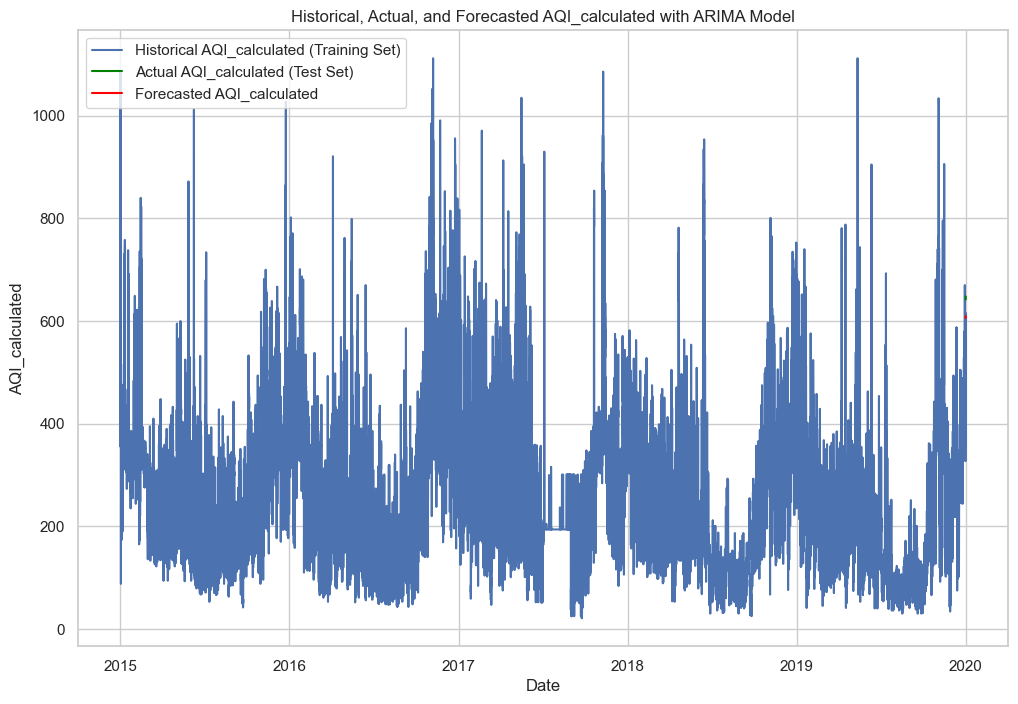

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(train, label='Historical AQI_calculated (Training Set)')
plt.plot(test, label='Actual AQI_calculated (Test Set)', color='green')
plt.plot(forecast_df_arima, label='Forecasted AQI_calculated', color='red')
plt.xlabel('Date')
plt.ylabel('AQI_calculated')
plt.title('Historical, Actual, and Forecasted AQI_calculated with ARIMA Model')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
actual = test  # The actual test set values
predicted = predicted = forecast_mean_arima  # The forecasted values

rmse = mean_squared_error(actual, predicted, squared=False)
mae = mean_absolute_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)

print("Mae:",mae)
print("RMSE:",rmse)
print("MAPE:",mape)

Mae: 37.20051495234202
RMSE: 37.2167545241133
MAPE: 0.05766853722954955


c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## **Regression Model**

In [49]:
from sklearn.model_selection import train_test_split
X=final.drop(['AQI_calculated'],axis=1)
y=final['AQI_calculated']
##Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **XG Boost Regression**

In [50]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Train the model
xgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_regressor.predict(X_test)



In [51]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
print("Mae:",mae_xgb)
print("RMSE:",rmse_xgb)
print("MAPE:",mape)
print("R2:",r2)

Mae: 2.4392061861324366
RMSE: 6.777977761470345
MAPE: 0.011189238360375496
R2: 0.9976838175994024


c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


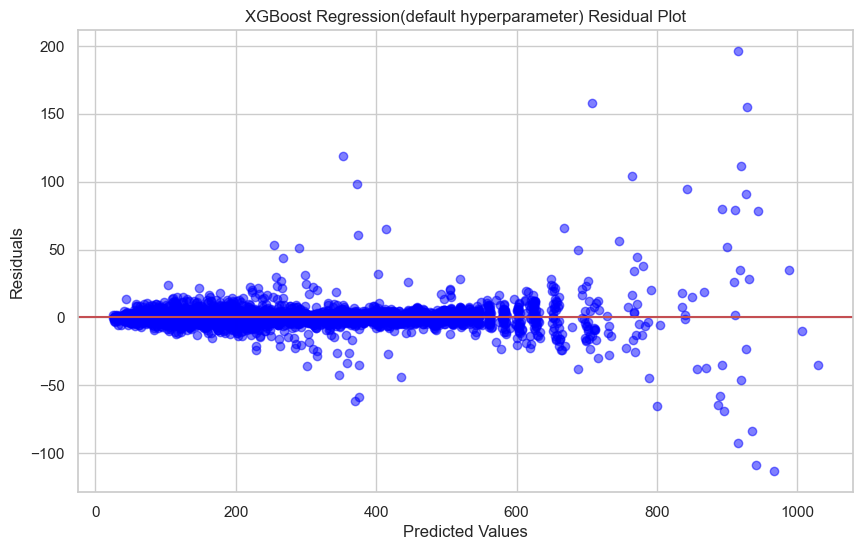

In [52]:
residuals = y_test - y_pred_xgb

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals, c='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBoost Regression(default hyperparameter) Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

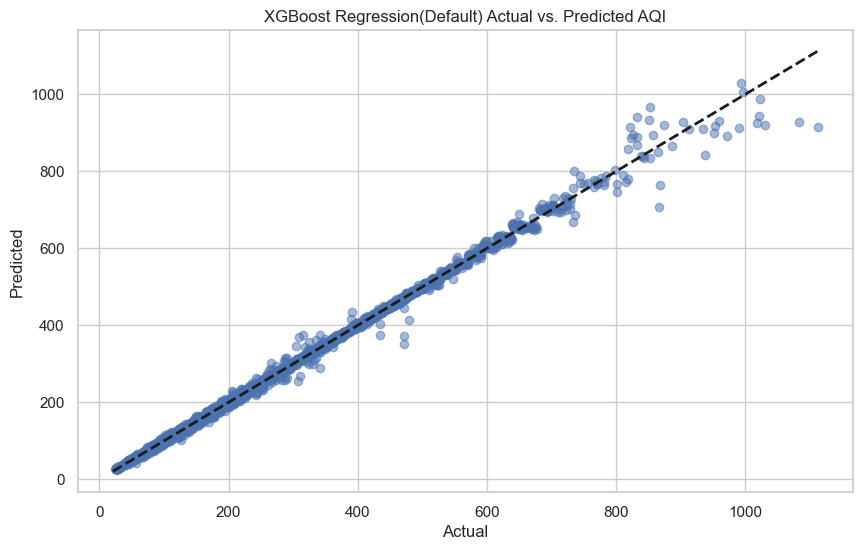

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Ideal line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Regression(Default) Actual vs. Predicted AQI')
plt.show()

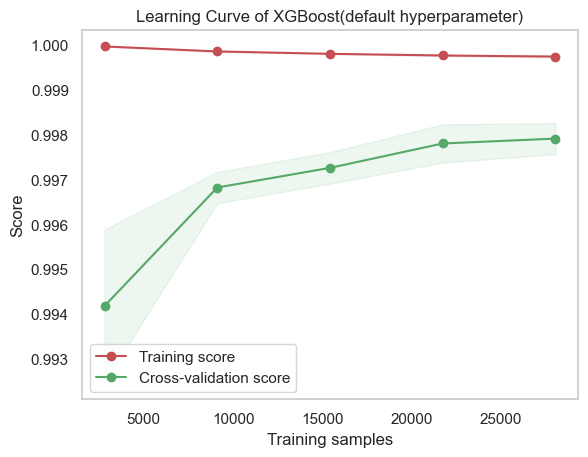

In [54]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
title = "Learning Curve of XGBoost(default hyperparameter)"
plot_learning_curve(xgb_regressor, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()

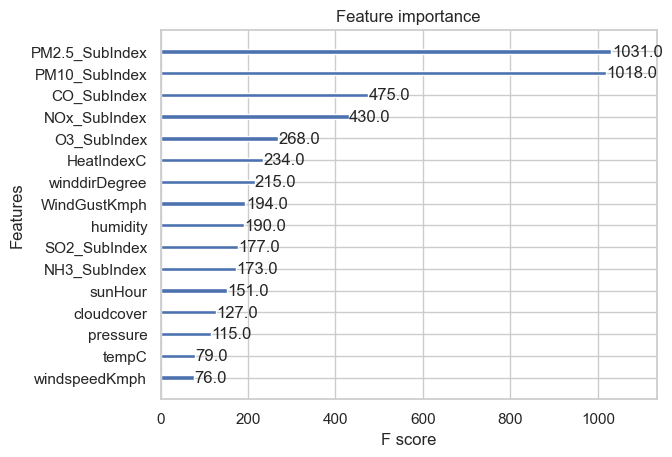

In [55]:
# Plot feature importance
xgb.plot_importance(xgb_regressor)
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4],                             # Maximum depth of the trees
    'subsample': [0.7, 0.8],                         # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8],                  # Subsample ratio of columns when constructing each tree
    'learning_rate': [0.03, 0.05],                   # Learning rate
    'n_estimators': [600, 700],                      # Number of boosting rounds
    'gamma': [0.3, 0.4],                             # Minimum loss reduction required to make a further partition
    'min_child_weight': [5, 6]                       # Minimum sum of instance weight (hessian) needed in a child
}

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           cv=5, verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0.3, 0.4],
                         'learning_rate': [0.03, 0.05], 'max_depth': [3, 4],
                         'min_child_weight': [5, 6], 'n_estimators': [600, 700],
                         'subsample': [0.7, 0.8]},
             verbose=1)

In [57]:
# Get the best model

best_xgb_model = grid_search.best_estimator_

# Get the best score
best_score = grid_search.best_score_

# Get the best parameters
best_params = grid_search.best_params_
print("Best Score:", best_score)
print("Best Parameters:", best_params)

Best Score: 0.9973033407417375
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 700, 'subsample': 0.8}


In [58]:

# Predict on the test set
y_pred_grid_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

# Print best score, best parameters, and evaluation metrics

print("Mae:", mae_xgb)
print("RMSE:", rmse_xgb)
print("MAPE:", mape)
print("R2:", r2)


Mae: 2.4392061861324366
RMSE: 6.777977761470345
MAPE: 0.011189238360375496
R2: 0.9976838175994024


c:\Users\erict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


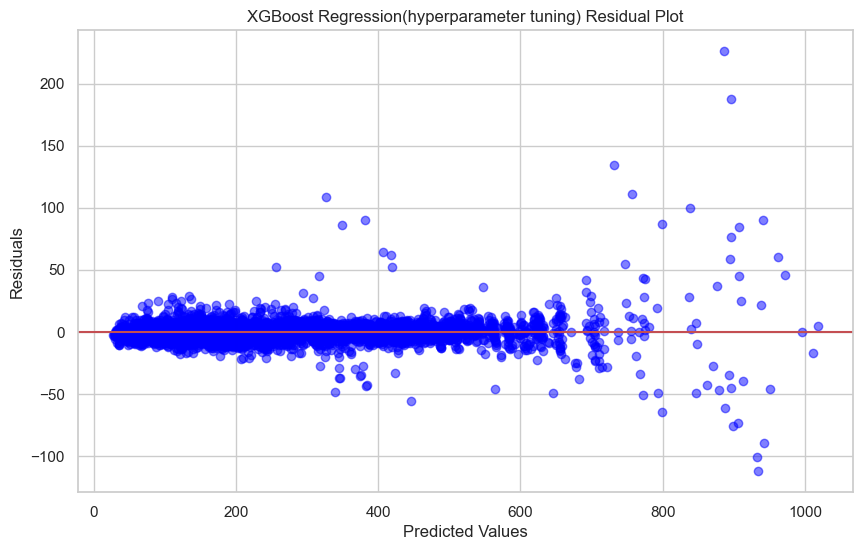

In [59]:
residuals = y_test - y_pred_grid_xgb

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_grid_xgb, residuals, c='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBoost Regression(hyperparameter tuning) Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

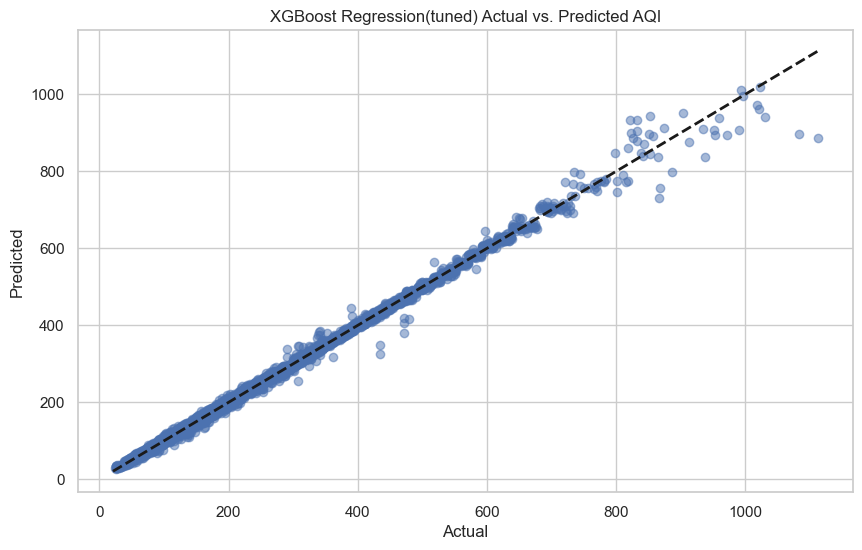

In [60]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_grid_xgb, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Ideal line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Regression(tuned) Actual vs. Predicted AQI')
plt.show()


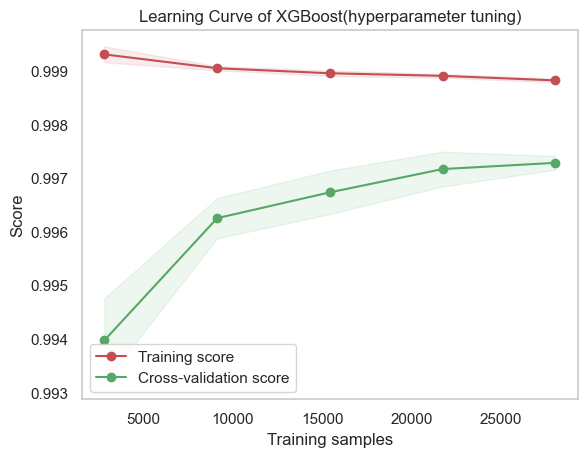

In [61]:
# Plot learning curve
plot_learning_curve(grid_search.best_estimator_, "Learning Curve of XGBoost(hyperparameter tuning)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()



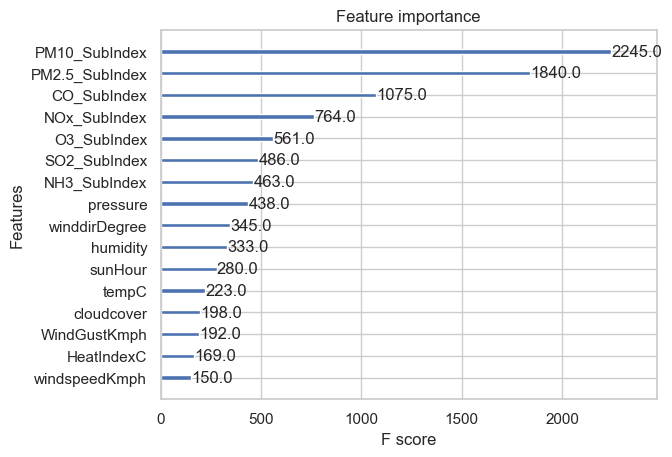

In [62]:
xgb.plot_importance(grid_search.best_estimator_)
plt.show()

## **Random Forest Regression**

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print("Mae:",mae)
print("RMSE:",rmse)
print("MAPE:",mape)
print("R2:",r2)

Mae: 0.4319794637763826
RMSE: 3.229531975791275
MAPE: 0.002145172260780557
R2: 0.9994741623772195


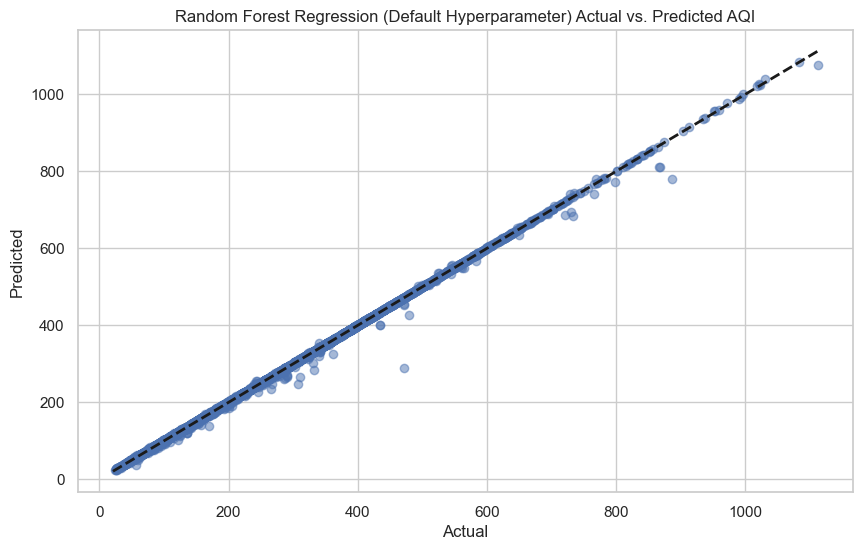

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Ideal line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression (Default Hyperparameter) Actual vs. Predicted AQI')
plt.show()

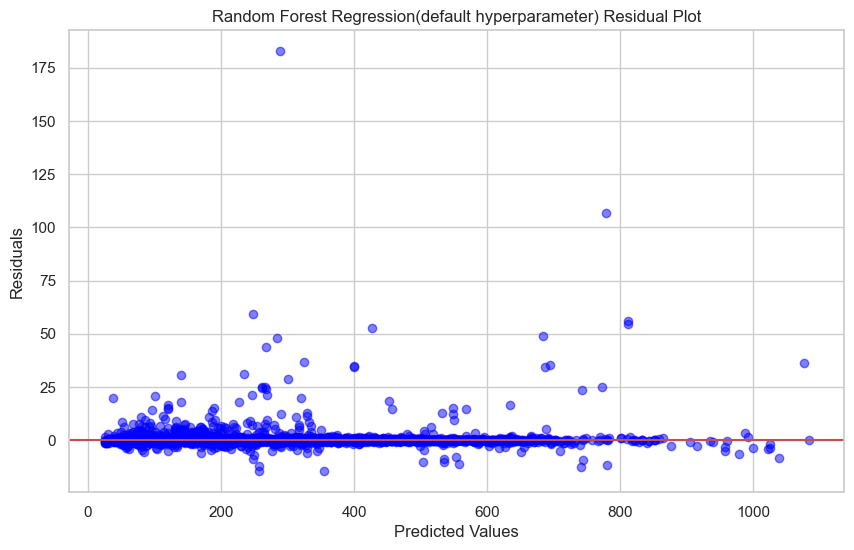

In [66]:
residuals = y_test - y_pred_rf

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, c='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regression(default hyperparameter) Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\erict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

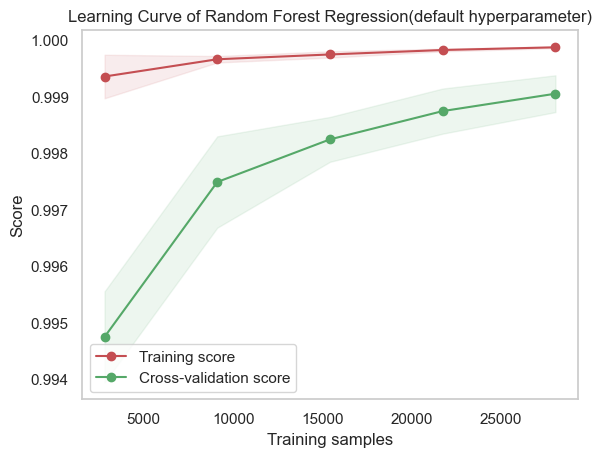

In [67]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
title = "Learning Curve of Random Forest Regression(default hyperparameter)"
plot_learning_curve(rf_regressor, title, X_train, y_train, cv=5, n_jobs=-1)

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [500,600,700],  # Number of trees in the forest
    'max_depth': [50, 100],            # Maximum depth of the trees
    'min_samples_split': [10, 20, 50], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [50, 75, 100], # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']   # Number of features to consider when looking for the best split
}

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define cross-validation strategy


# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
    cv=5,n_jobs=-1,verbose=1
)

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [50, 75, 100],
                         'min_samples_split': [10, 20, 50],
                         'n_estimators': [500, 600, 700]},
             verbose=1)

In [69]:
# Best parameters found
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 10, 'n_estimators': 500}
Best score: 0.9665216918636677


In [70]:


# Predict on the test set using the best model found
y_pred_grid_rf = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_grid_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_grid_rf))
r2 = r2_score(y_test, y_pred_grid_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_grid_rf)

# Print evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Mape:", mape)

MAE: 11.314389216144052
RMSE: 25.13129288128785
R2: 0.968157867798224
Mape: 0.055035534683893925


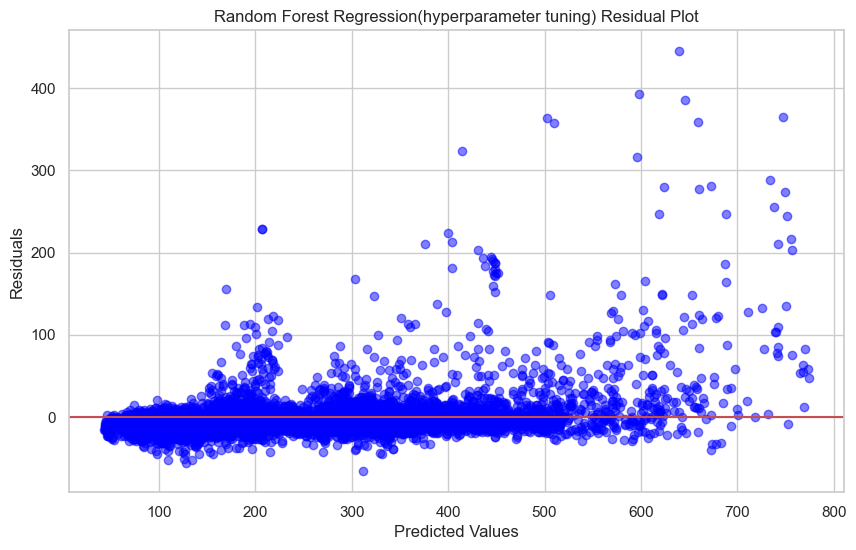

In [71]:

residuals = y_test - y_pred_grid_rf

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_grid_rf, residuals, c='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regression(hyperparameter tuning) Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

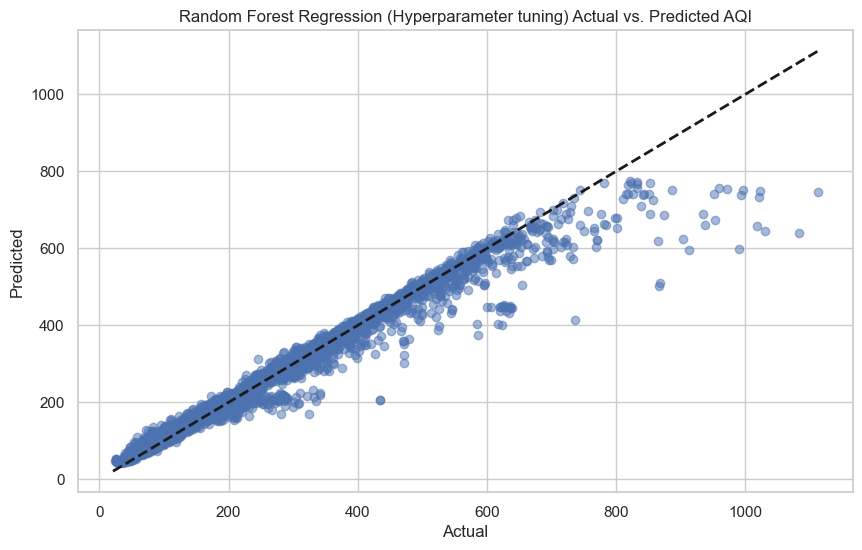

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_grid_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Ideal line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression (Hyperparameter tuning) Actual vs. Predicted AQI')
plt.show()

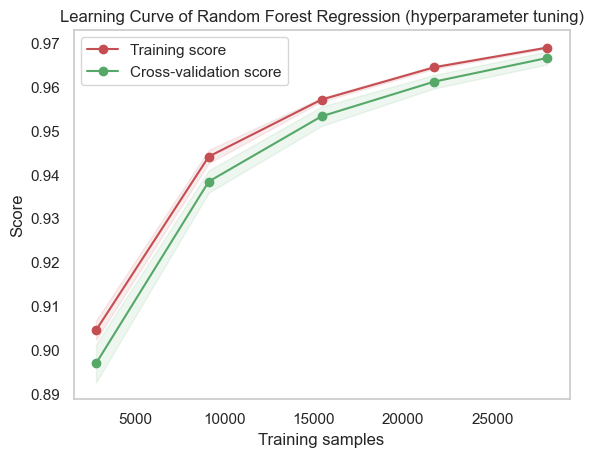

In [73]:
# Plot learning curve
title = "Learning Curve of Random Forest Regression (hyperparameter tuning)"
plot_learning_curve(grid_search.best_estimator_, title, X_train, y_train, cv=5)
plt.show()

## **Support Vector Regression Model**

In [74]:
from sklearn.svm import SVR
svr_model = SVR()

# Training the model
svr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svr = svr_model.predict(X_test)



In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mape = mean_absolute_percentage_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print("Mae:",mae)
print("RMSE:",rmse)
print("MAPE:",mape)
print("R2:",r2)

Mae: 22.569069177870137
RMSE: 35.94785392788084
MAPE: 0.10282472770428279
R2: 0.9348494007405295


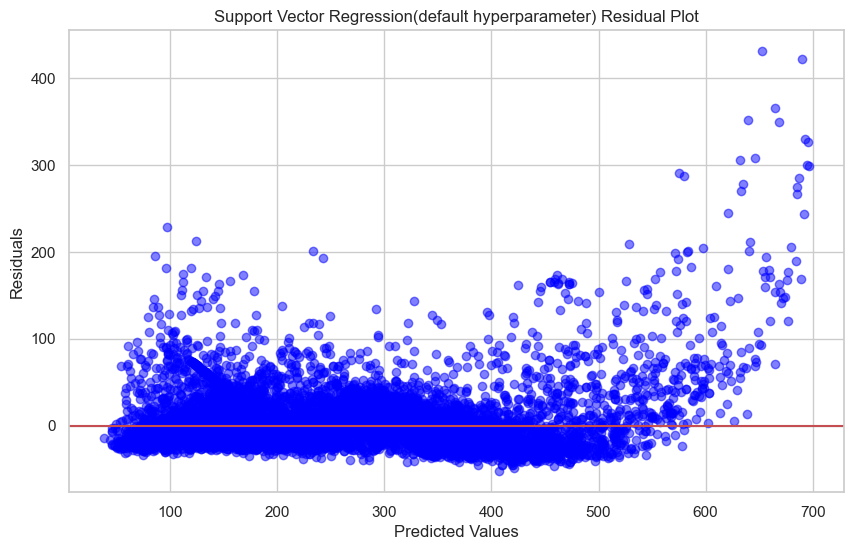

In [76]:
residuals = y_test - y_pred_svr

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_svr, residuals, c='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Support Vector Regression(default hyperparameter) Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

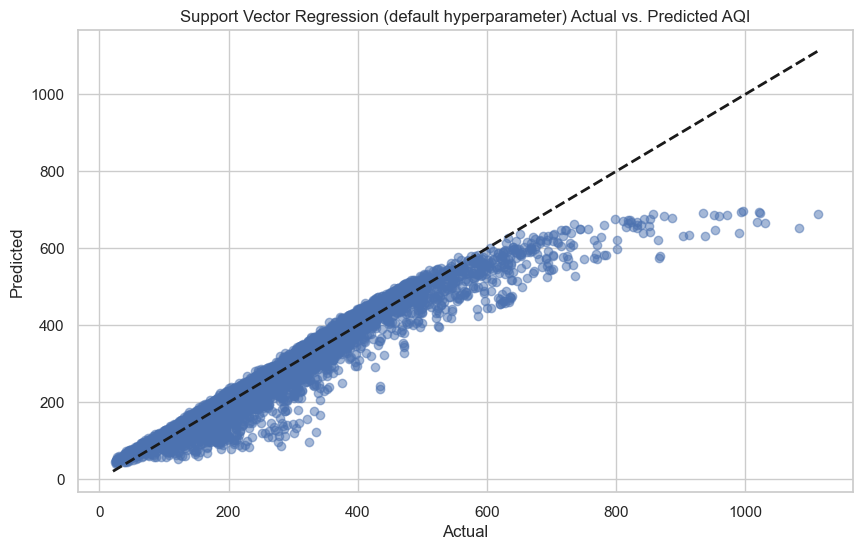

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Ideal line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression (default hyperparameter) Actual vs. Predicted AQI')
plt.show()

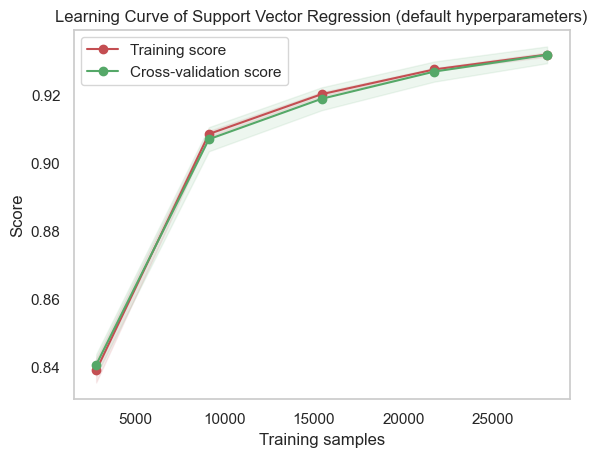

In [78]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
title = "Learning Curve of Support Vector Regression (default hyperparameters)"
plot_learning_curve(svr_model, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [79]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
param_grid = {
    'svr__C': [5.0,10.0,20.0],      # Regularization parameter
    'svr__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'svr__degree': [2, 3, 4],       # Degree of the polynomial kernel
    'svr__gamma': ['scale', 'auto']  # Kernel coefficient
}
# Create SVR model
svr_model = make_pipeline(StandardScaler(), SVR())

# Create GridSearchCV object
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Perform grid search
grid_search_svr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [5.0, 10.0, 20.0], 'svr__degree': [2, 3, 4],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [80]:
# Best parameters found
print("Best parameters:", grid_search_svr.best_params_)
print("Best score:", grid_search_svr.best_score_)

Best parameters: {'svr__C': 20.0, 'svr__degree': 2, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
Best score: 0.9854350787967455


In [81]:
# Predict on the test set using the best model found
y_pred_grid_svr = grid_search_svr.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_grid_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_grid_svr))
r2 = r2_score(y_test, y_pred_svr)
mape = mean_absolute_percentage_error(y_test, y_pred_grid_svr)

# Print evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Mape:", mape)

MAE: 7.642558301740727
RMSE: 17.39848565749859
R2: 0.9348494007405295
Mape: 0.036154039170275834


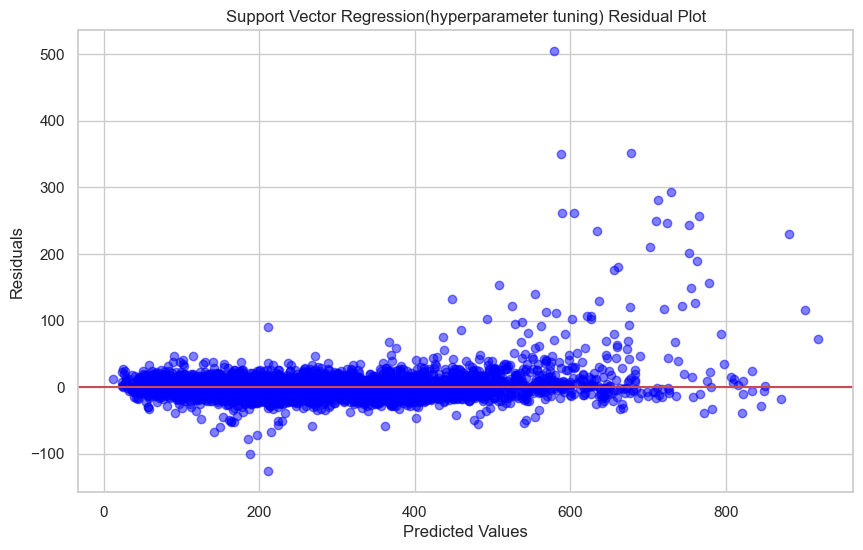

In [82]:
residuals = y_test - y_pred_grid_svr

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_grid_svr, residuals, c='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Support Vector Regression(hyperparameter tuning) Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

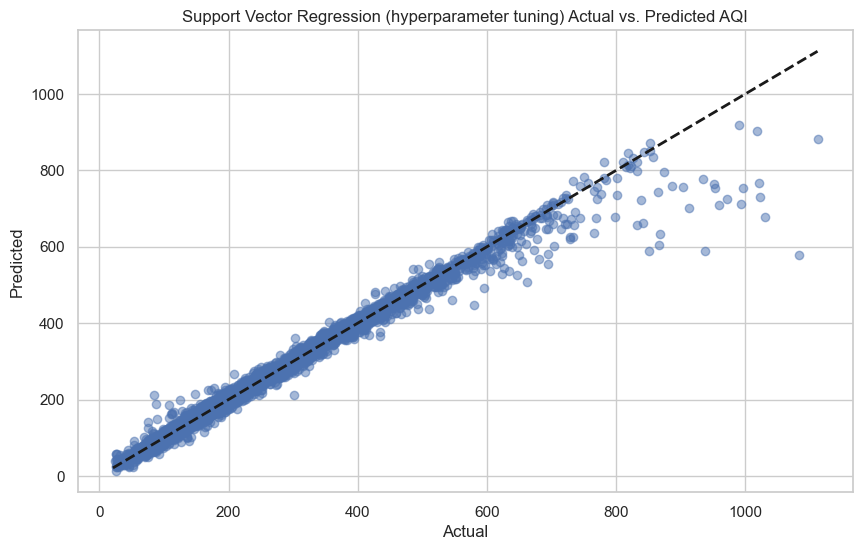

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_grid_svr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Ideal line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression (hyperparameter tuning) Actual vs. Predicted AQI')
plt.show()

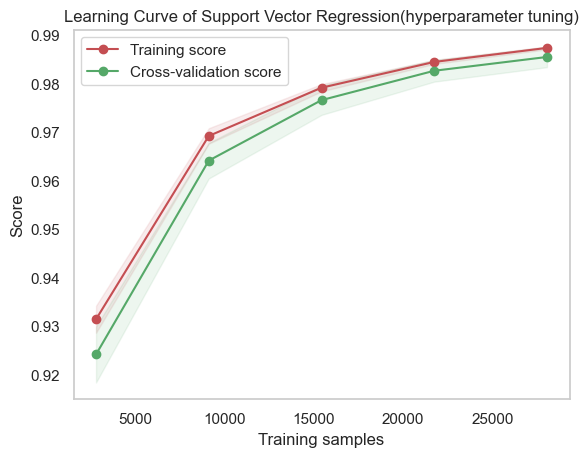

In [84]:
# Plot learning curve
plot_learning_curve(grid_search_svr.best_estimator_,
                     "Learning Curve of Support Vector Regression(hyperparameter tuning)",
                       X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [85]:
final.columns

Index(['sunHour', 'HeatIndexC', 'WindGustKmph', 'cloudcover', 'humidity',
       'pressure', 'tempC', 'winddirDegree', 'windspeedKmph', 'PM2.5_SubIndex',
       'PM10_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex',
       'SO2_SubIndex', 'O3_SubIndex', 'AQI_calculated'],
      dtype='object')

## **Import New Data to predict next time AQI**


In [86]:
new_data = pd.read_csv("C:\\Users\\erict\\OneDrive - Asia Pacific University\\Documents\\level 3\\Final Year Project\\dataset\\data.csv")
new_data

,sunHour,HeatIndexC,WindGustKmph,cloudcover,humidity,pressure,tempC,winddirDegree,windspeedKmph,PM2.5_SubIndex,PM10_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,SO2_SubIndex,O3_SubIndex,AQI_calculated
0,7.5,28,15,20,65,1015,30,180,10,15,12,20,10,8,5,25,70


In [ ]:
X_new = new_data.drop(['AQI_calculated'], axis=1)
y_new = new_data['AQI_calculated']

# Scale the new data using the same scaler used for training data

# Predict on the new dataset
y_pred_new = rf_regressor.predict(X_new)

In [ ]:
print("Predicted AQI values:", y_pred_new)

Predicted AQI values: [27.21]


In [ ]:
import pickle

# Save the trained model to a file
with open("rf_regressor_model.pkl", "wb") as f:
    pickle.dump(rf_regressor, f)

In [ ]:
import pickle
with open("rf_regressor_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Now, you can use loaded_model to make predictions
loaded_model.predict(X_new)

array([27.21])